In [187]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pandas as pd
import geopandas as gpd
import matplotlib.colors as mcolors
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker


In [188]:
# Caricamento dei CSV con gestione del separatore e encoding
dati_film = pd.read_csv(r'C:\Users\39338\OneDrive\Desktop\Visualizzazione Scientifica\database_film.csv', sep=";", encoding="utf-8", on_bad_lines="skip")
# Definire le colonne
colonna_titolo = "Titolo"
colonna_anno = "Anno"
colonna_incassi = "Incasso ($)"
colonna_franchise = "Franchise"
colonna_ambientazione = "Ambientazione"
colonna_tipo = "Tipo"
colonna_tomatometer = "Tomatometer (%)"
colonna_popcornmeter = "Popcornmeter (%)"
colonna_classico = "Classico"

dati_fatturati = pd.read_csv(r'C:\Users\39338\OneDrive\Desktop\Visualizzazione Scientifica\database_fatturati.csv', sep=';', encoding='utf-8', on_bad_lines='skip')

dati_parchi = pd.read_csv(r'C:\Users\39338\OneDrive\Desktop\Visualizzazione Scientifica\database_parchi.csv', sep=";", encoding="utf-8", on_bad_lines="skip")
# Conversione della colonna "Visitatori (Milioni)" da stringa con virgola a numeri (float)
dati_parchi['Visitatori (Milioni)'] = dati_parchi['Visitatori (Milioni)'].str.replace(',', '.').astype(float)

In [189]:
# Colormap personalizzata
rosa_colors = [
    (255/255, 224/255, 241/255),  # Rosa chiaro pastello
    (255/255, 153/255, 228/255),  # Rosa
    (255/255, 112/255, 229/255),  # Rosa confetto
    (247/255, 127/255, 190/255),  # Rosa fucsia chiaro
    (246/255, 83/255, 166/255),   # Fucsia chiaro vivace
    (255/255, 0/255, 144/255),    # Fucsia intenso
    (195/255, 9/255, 148/255)     # Fucsia scuro
]

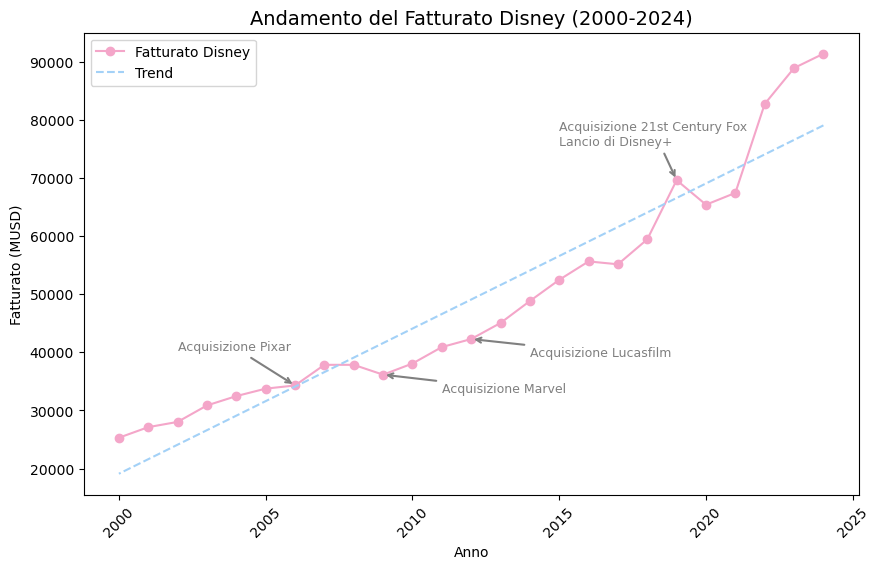

In [190]:
# Dati
anni = [2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 
        2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000]
fatturato = [91361, 88898, 82722, 67418, 65388, 69607, 59434, 55137, 55632, 52465, 48813, 45041, 42278, 
          40893, 38063, 36149, 37843, 37843, 34292, 33745, 32463, 30855, 28022, 27122, 25300]

# Creazione del grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Linea principale (rosa)
ax.plot(anni, fatturato, marker='o', linestyle='-', color='#F4A6C9', label="Fatturato Disney")

# Linea di tendenza (azzurra, tratteggiata)
z = np.polyfit(anni, fatturato, 1)  # Fit di regressione lineare
p = np.poly1d(z)
ax.plot(anni, p(anni), linestyle='dashed', color='#A3D1F7', label="Trend")

# Aggiunta delle annotazioni per le acquisizioni
acquisizioni = {
    2006: ("Acquisizione Pixar", (2006 - 4, fatturato[anni.index(2006)] + 6000)),  # Pixar in alto
    2009: ("Acquisizione Marvel", (2009 + 2, fatturato[anni.index(2009)] - 3000)),  # Marvel in basso
    2012: ("Acquisizione Lucasfilm", (2012 + 2, fatturato[anni.index(2012)] - 3000)),  # Lucasfilm in basso
    2019: ("Acquisizione 21st Century Fox \nLancio di Disney+", (2019 - 4, fatturato[anni.index(2019)] + 6000))  # Fox in alto
}

for anno, (testo, posizione) in acquisizioni.items():  
    ax.annotate(testo, 
                xy=(anno, fatturato[anni.index(anno)]), 
                xytext=posizione,  # Posizione personalizzata
                arrowprops=dict(facecolor='gray', edgecolor='gray', arrowstyle='->', lw=1.5),  # Freccia grigia
                fontsize=9, color='gray')  # Annotazione grigia

# Ruotare le etichette dell'asse X per una lettura migliore
plt.xticks(rotation=45)

# Rimuove lo sfondo
ax.set_facecolor('none')  # Rimuove lo sfondo del grafico
fig.patch.set_facecolor('none')  # Rimuove lo sfondo esterno

# Titoli e etichette
ax.set_title("Andamento del Fatturato Disney (2000-2024)", fontsize=14)
ax.set_xlabel("Anno")
ax.set_ylabel("Fatturato (MUSD)")
ax.legend()

# Mostra il grafico
plt.grid(False)  # Rimuove la griglia
plt.show()

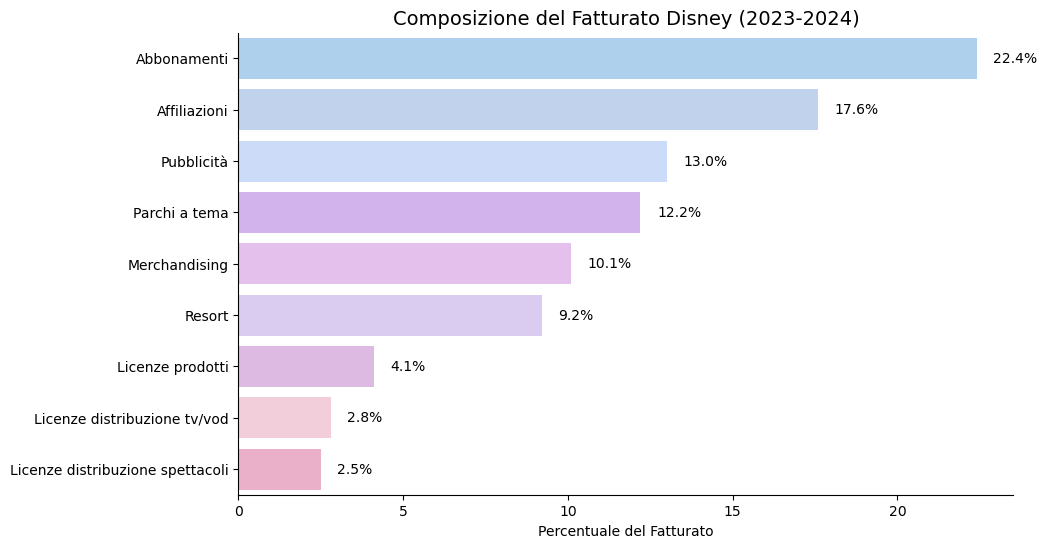

In [191]:
# Dati
percentuali_2023_24 = [22.4, 17.6, 13, 12.2, 10.1, 9.2, 4.1, 2.8, 2.5]
etichette = ['Abbonamenti', 'Affiliazioni', 'Pubblicità', 'Parchi a tema', 'Merchandising', 'Resort', 
             'Licenze prodotti', 'Licenze distribuzione tv/vod', 'Licenze distribuzione spettacoli']

# Creazione della figura
fig, ax = plt.subplots(figsize=(10, 6))

# Grafico a barre orizzontali
colori = ['#A3D1F7', '#B9D1F3', '#C3D9FF', '#D3A9F5', '#E9B9F3', '#D9C6F7', '#E1B3E7', '#F8C8D8', '#F4A6C9']
sns.barplot(x=percentuali_2023_24, y=etichette, palette=colori, ax=ax)

# Aggiungere le percentuali sulle barre
for i, v in enumerate(percentuali_2023_24):
    ax.text(v + 0.5, i, f"{v:.1f}%", va='center', fontsize=10)

# Titolo
ax.set_title('Composizione del Fatturato Disney (2023-2024)', fontsize=14)

# Rimuovere il bordo superiore e destro
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Etichette degli assi
ax.set_xlabel("Percentuale del Fatturato")
ax.set_ylabel("")

# Rimuove il colore dello sfondo
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

# Mostrare il grafico
plt.show()

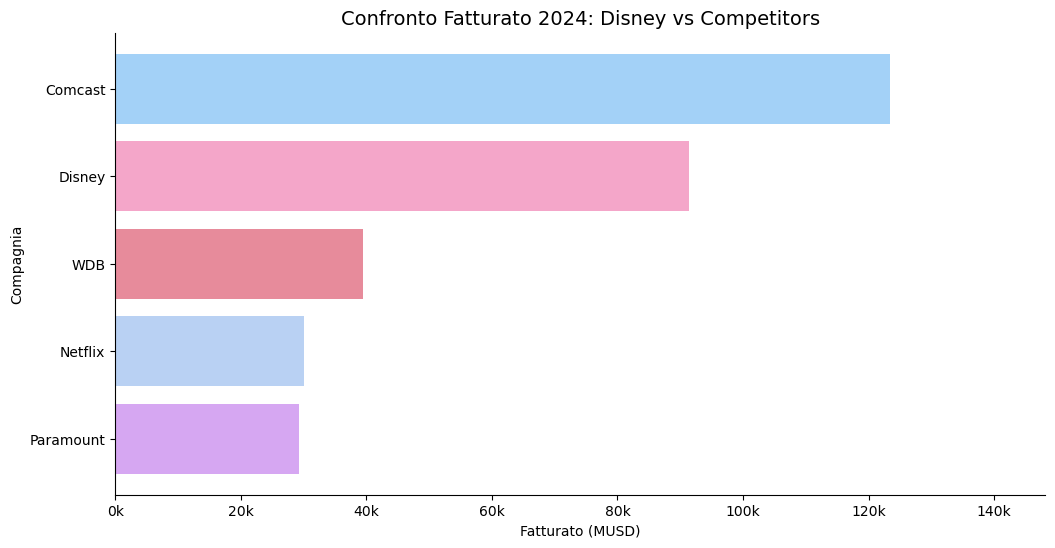

In [192]:
# Filtrare solo i dati dell'anno più recente
fatturatomax = dati_fatturati[dati_fatturati['Anno'] == dati_fatturati['Anno'].max()]

# Estrarre compagnie e fatturati
compagnie = fatturatomax['Compagnia'].tolist()
fatturati = fatturatomax['Fatturato (MUSD)'].tolist()

# Ordinamento per visualizzazione più chiara
compagnie, fatturati = zip(*sorted(zip(compagnie, fatturati), key=lambda x: x[1], reverse=True))

# Creazione del grafico senza sfondo
fig, ax = plt.subplots(figsize=(12, 6))

# Colori per le barre
colori = ['#A3D1F7', '#F4A6C9', '#E78B9B', '#B9D1F3', '#D6A7F2']
ax.barh(compagnie, fatturati, color=colori)

# Rimuove il colore dello sfondo
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

# Rimuovere il bordo superiore e destro
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Etichette e titolo
ax.set_xlabel('Fatturato (MUSD)')
ax.set_ylabel('Compagnia')
ax.set_title(f'Confronto Fatturato {dati_fatturati["Anno"].max()}: Disney vs Competitors', fontsize=14)

# Funzione per formattare i numeri in 'k' (es. 20000 → 20k)
def format_k(x, pos):
    return f'{int(x/1000)}k'

# Applicare la formattazione all'asse X
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_k))

ax.invert_yaxis()  # Ordina dal più grande in alto
plt.grid(False)  # Rimuove la griglia

# Modifica dei limiti dell'asse X per fare spazio ai numeri
ax.set_xlim(0, max(fatturati) * 1.2)

plt.show()

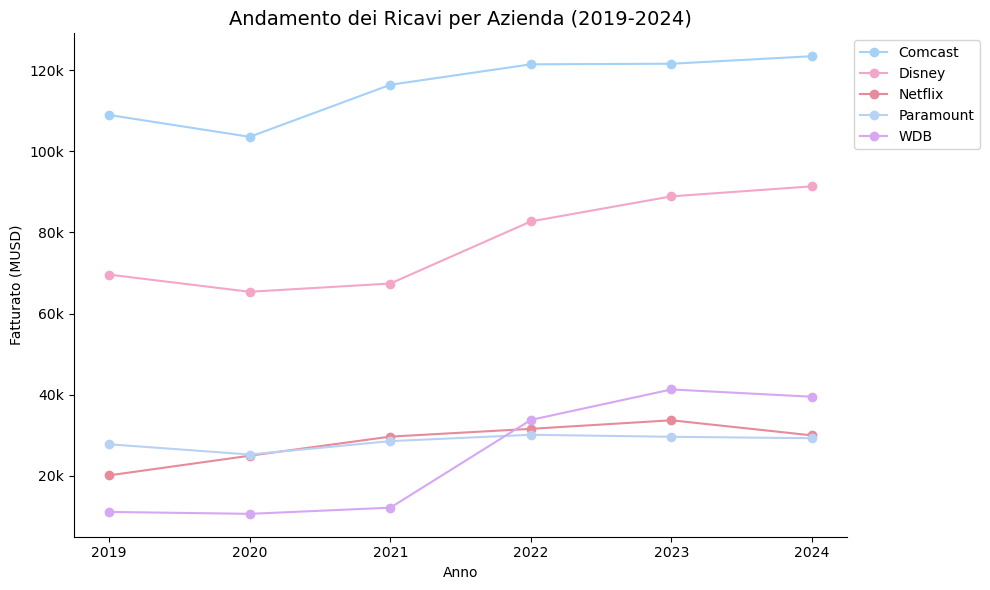

In [193]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filtrare i dati per gli anni dal 2019 al 2024
fatturati_compagnie = dati_fatturati[(dati_fatturati['Anno'] >= 2019) & (dati_fatturati['Anno'] <= 2024)]

# Pivot dei dati per avere gli anni come colonne
dati_pivot = fatturati_compagnie.pivot(index='Anno', columns='Compagnia', values='Fatturato (MUSD)')

# Creazione del grafico
plt.figure(figsize=(10, 6))

# Generazione di una palette di colori dinamica
colori = ['#A3D1F7', '#F4A6C9', '#E78B9B', '#B9D1F3', '#D6A7F2']
for idx, compagnia in enumerate(dati_pivot.columns):
    plt.plot(dati_pivot.index, dati_pivot[compagnia], marker='o', label=compagnia, color=colori[idx])

# Rimuovere lo sfondo del grafico
ax = plt.gca()
ax.set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

# Rimuovere i bordi superiore e destro
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Etichette e titolo
plt.xlabel('Anno')
plt.ylabel('Fatturato (MUSD)')
plt.title('Andamento dei Ricavi per Azienda (2019-2024)', fontsize=14)

# Funzione per formattare l'asse Y in 'k' (es. 20000 → 20k)
def format_k(x, pos):
    return f'{int(x/1000)}k'

# Applicare la formattazione all'asse Y
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_k))

# Spostare la legenda fuori dal grafico
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Mostra il grafico
plt.grid(False)  # Rimuove la griglia
plt.tight_layout()  # Adatta gli elementi per evitare sovrapposizioni
plt.show()




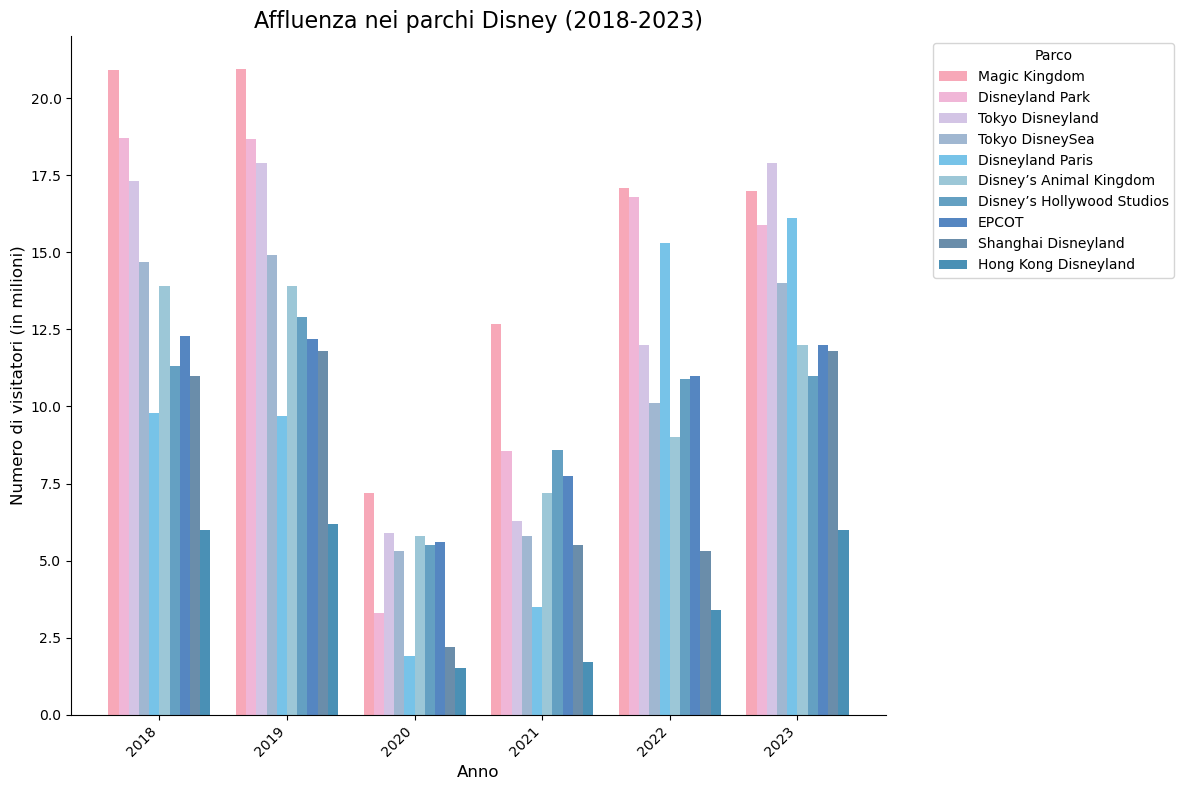

In [220]:
# Elenco dei parchi
parchi = dati_parchi['Parco'].unique()

# Anni disponibili
anni = dati_parchi['Anno'].unique()

# Creiamo un dizionario per memorizzare i dati dei visitatori per ogni parco e anno
visitatori_per_parco_anno = {}

# Popoliamo il dizionario con i dati
for parco in parchi:
    visitatori_per_parco_anno[parco] = []
    for anno in anni:
        # Filtriamo i dati per parco e anno
        visitatori = dati_parchi[(dati_parchi['Parco'] == parco) & (dati_parchi['Anno'] == anno)]['Visitatori (Milioni)']
        if not visitatori.empty:
            visitatori_per_parco_anno[parco].append(visitatori.iloc[0])
        else:
            visitatori_per_parco_anno[parco].append(np.nan)

# Convertiamo i dati in un array numpy per utilizzarli nel grafico
data = np.array([visitatori_per_parco_anno[parco] for parco in parchi])

# Definiamo una palette di colori sui toni del rosa, azzurro e lilla
colors = ['#F7A8B8', '#F0B6D7', '#D3C4E5', '#A0B7D1', '#77C3E8', '#9CC7D7', '#64A0C2', '#5586C1', '#6A8DAA', '#4A90B5']

# Creiamo il grafico a barre
plt.figure(figsize=(12, 8))

# Posizioni delle barre
bar_width = 0.08
index = np.arange(len(anni))

# Plot delle barre per ogni parco (aggiungiamo un offset per ogni parco)
for i, parco in enumerate(parchi):
    plt.bar(index + i * bar_width, data[i, :], bar_width, label=parco, color=colors[i])

# Aggiungiamo le etichette e il titolo
plt.title("Affluenza nei parchi Disney (2018-2023)", fontsize=16)
plt.xlabel("Anno", fontsize=12)
plt.ylabel("Numero di visitatori (in milioni)", fontsize=12)
plt.xticks(index + bar_width * (len(parchi) - 1) / 2, anni, rotation=45, ha='right')
plt.legend(title="Parco", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Togliamo lo sfondo
ax = plt.gca()
plt.gca().set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

# Rimuovere il bordo superiore e destro
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mostriamo il grafico
plt.grid(False)  # Rimuove la griglia
plt.tight_layout()
plt.show()

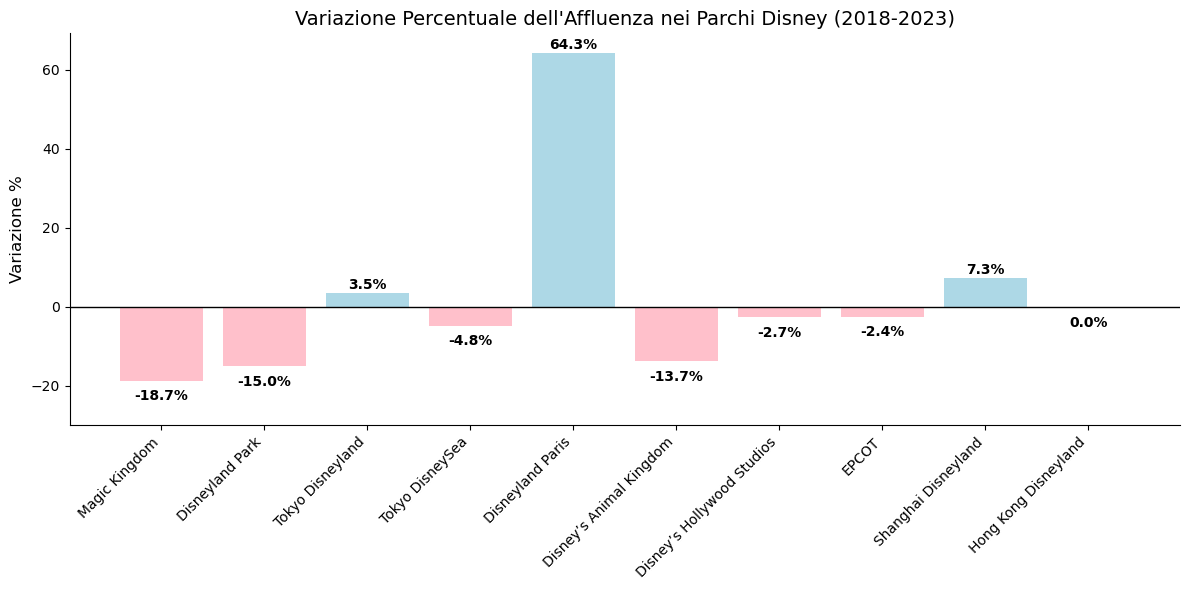

In [219]:
# Filtriamo i dati per solo il 2018 e il 2023
dati_2018 = dati_parchi[dati_parchi["Anno"] == 2018].set_index("Parco")["Visitatori (Milioni)"]
dati_2023 = dati_parchi[dati_parchi["Anno"] == 2023].set_index("Parco")["Visitatori (Milioni)"]

# Calcoliamo la variazione percentuale
variazione_percentuale = ((dati_2023 - dati_2018) / dati_2018) * 100

# Creiamo il grafico a barre
plt.figure(figsize=(12, 6))
colori = ['lightblue' if v > 0 else 'pink' for v in variazione_percentuale]  # Blu per aumenti, rosa per cali

bars = plt.bar(variazione_percentuale.index, variazione_percentuale, color=colori)

# Aggiungere le etichette con la variazione in percentuale sopra ogni barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + (2 if height > 0 else -4),  
             f"{height:.1f}%", ha="center", va="center", fontsize=10, fontweight="bold")

# Etichette e titolo
plt.title("Variazione Percentuale dell'Affluenza nei Parchi Disney (2018-2023)", fontsize=14)
plt.ylabel("Variazione %", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Imposta i limiti dell'asse Y per arrivare almeno a -30%
plt.ylim(-30, max(variazione_percentuale) + 5)

# Linea orizzontale sull'asse 0
plt.axhline(0, color='black', linewidth=1)

# Togliere lo sfondo
ax = plt.gca()
plt.gca().set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

# Rimuovere il bordo superiore e destro
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mostrare il grafico
plt.tight_layout()
plt.show()


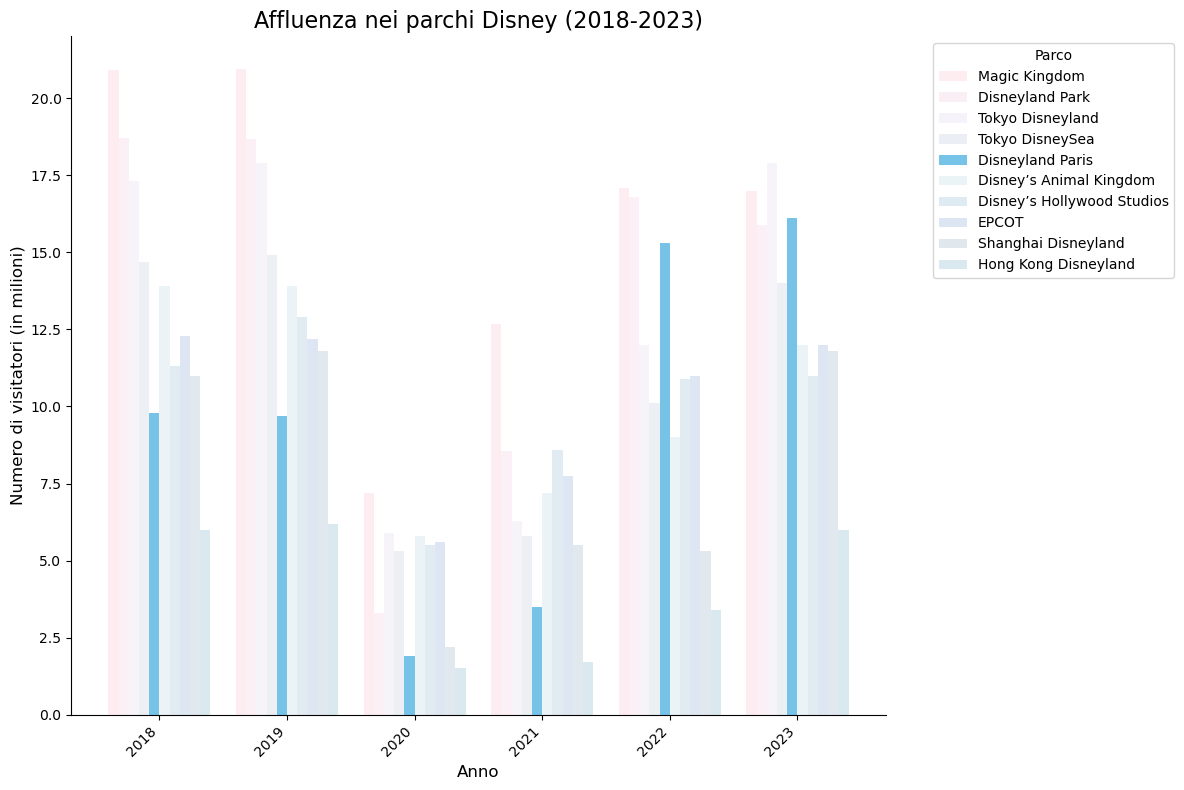

In [225]:
# Elenco dei parchi
parchi = dati_parchi['Parco'].unique()

# Anni disponibili
anni = dati_parchi['Anno'].unique()

# Creiamo un dizionario per memorizzare i dati dei visitatori per ogni parco e anno
visitatori_per_parco_anno = {}

# Popoliamo il dizionario con i dati
for parco in parchi:
    visitatori_per_parco_anno[parco] = []
    for anno in anni:
        # Filtriamo i dati per parco e anno
        visitatori = dati_parchi[(dati_parchi['Parco'] == parco) & (dati_parchi['Anno'] == anno)]['Visitatori (Milioni)']
        if not visitatori.empty:
            visitatori_per_parco_anno[parco].append(visitatori.iloc[0])
        else:
            visitatori_per_parco_anno[parco].append(np.nan)

# Convertiamo i dati in un array numpy per utilizzarli nel grafico
data = np.array([visitatori_per_parco_anno[parco] for parco in parchi])

# Definiamo una palette di colori sui toni del rosa, azzurro e lilla
colors = ['#F7A8B8', '#F0B6D7', '#D3C4E5', '#A0B7D1', '#77C3E8', '#9CC7D7', '#64A0C2', '#5586C1', '#6A8DAA', '#4A90B5']

# Creiamo il grafico a barre
plt.figure(figsize=(12, 8))

# Posizioni delle barre
bar_width = 0.08
index = np.arange(len(anni))

# Plot delle barre per ogni parco con trasparenza (eccetto Tokyo Disneyland)
for i, parco in enumerate(parchi):
    if parco == 'Disneyland Paris':
        alpha = 1.0  # Disneyland Paris opaco
    else:
        alpha = 0.2  # Altri parchi semi-trasparenti
    
    plt.bar(index + i * bar_width, data[i, :], bar_width, label=parco, color=colors[i], alpha=alpha)

# Aggiungiamo le etichette e il titolo
plt.title("Affluenza nei parchi Disney (2018-2023)", fontsize=16)
plt.xlabel("Anno", fontsize=12)
plt.ylabel("Numero di visitatori (in milioni)", fontsize=12)
plt.xticks(index + bar_width * (len(parchi) - 1) / 2, anni, rotation=45, ha='right')
plt.legend(title="Parco", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Togliamo lo sfondo
ax = plt.gca()
plt.gca().set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

# Rimuovere il bordo superiore e destro
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mostriamo il grafico
plt.grid(False)  # Rimuove la griglia
plt.tight_layout()
plt.show()

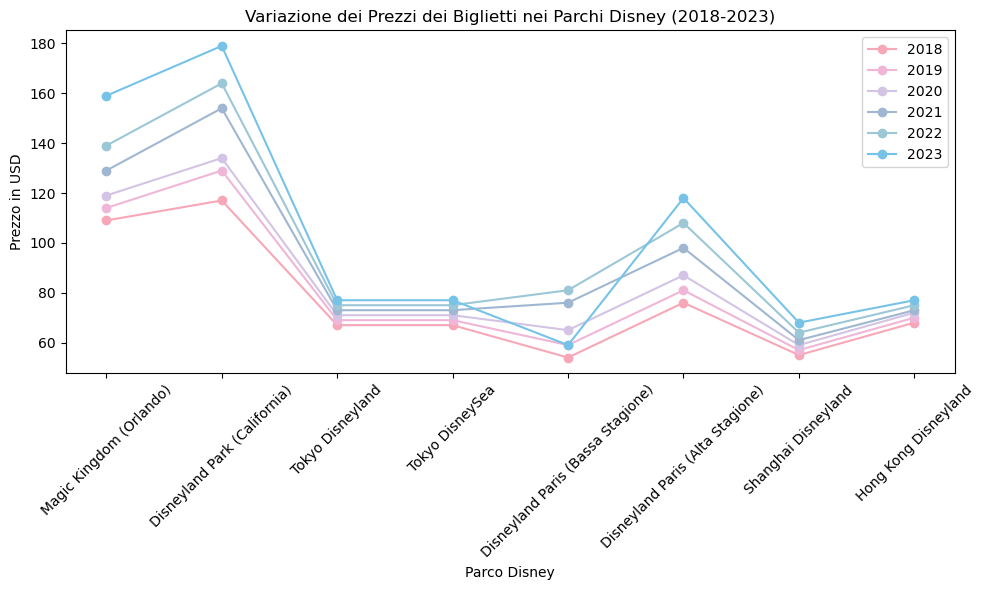

In [196]:
# Dati dei prezzi in USD
parchi = [
    'Magic Kingdom (Orlando)',
    'Disneyland Park (California)',
    'Tokyo Disneyland',
    'Tokyo DisneySea',
    'Disneyland Paris (Bassa Stagione)',
    'Disneyland Paris (Alta Stagione)',
    'Shanghai Disneyland',
    'Hong Kong Disneyland'
]

prezzi_2018 = [109, 117, 67, 67, 54, 76, 55, 68]
prezzi_2019 = [114, 129, 69, 69, 59, 81, 57, 70]
prezzi_2020 = [119, 134, 71, 71, 65, 87, 59, 72]
prezzi_2021 = [129, 154, 73, 73, 76, 98, 61, 73]
prezzi_2022 = [139, 164, 75, 75, 81, 108, 64, 75]
prezzi_2023 = [159, 179, 77, 77, 59, 118, 68, 77]

# Lista dei colori personalizzati
colors = ['#F7A8B8', '#F0B6D7', '#D3C4E5', '#A0B7D1', '#9CC7D7', '#77C3E8', '#64A0C2', '#5586C1']

# Creazione del grafico
plt.figure(figsize=(10, 6))

# Plot per ogni anno con i colori personalizzati
plt.plot(parchi, prezzi_2018, marker='o', label='2018', color=colors[0])
plt.plot(parchi, prezzi_2019, marker='o', label='2019', color=colors[1])
plt.plot(parchi, prezzi_2020, marker='o', label='2020', color=colors[2])
plt.plot(parchi, prezzi_2021, marker='o', label='2021', color=colors[3])
plt.plot(parchi, prezzi_2022, marker='o', label='2022', color=colors[4])
plt.plot(parchi, prezzi_2023, marker='o', label='2023', color=colors[5])

# Titolo e etichette
plt.title('Variazione dei Prezzi dei Biglietti nei Parchi Disney (2018-2023)')
plt.xlabel('Parco Disney')
plt.ylabel('Prezzo in USD')
plt.xticks(rotation=45)
plt.legend()

# Togliamo lo sfondo
plt.gca().set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

# Mostra il grafico
plt.tight_layout()
plt.show()


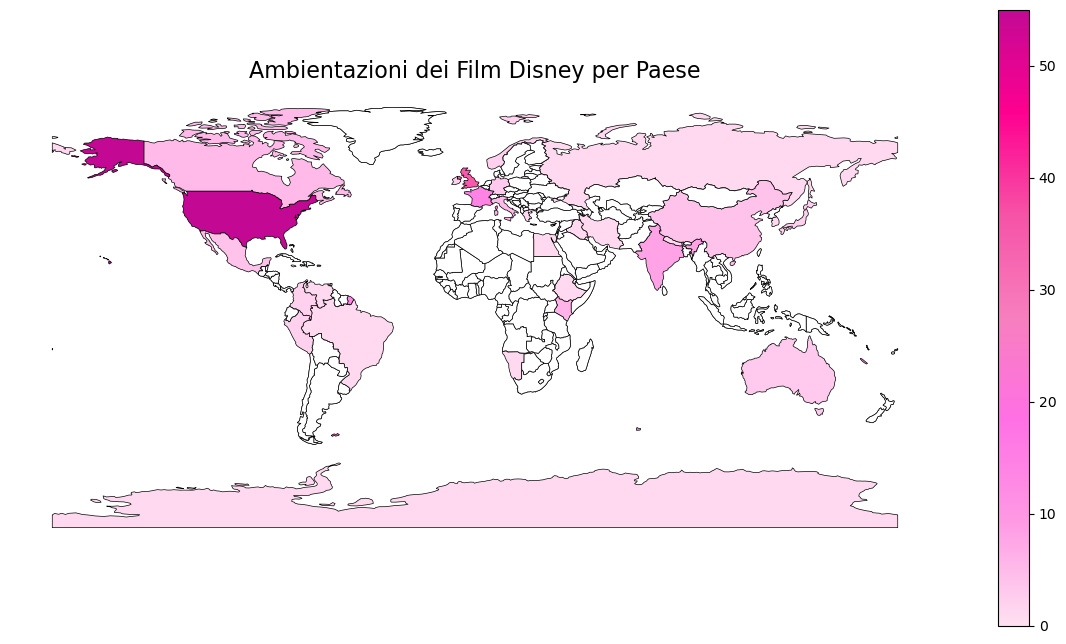

In [214]:
# Contare il numero di film per ogni paese (basato sulla colonna 'Ambientazioni')
film_per_paese = dati_film[colonna_ambientazione].value_counts()

# Carica il dataset dei confini geopolitici
world = gpd.read_file("C:/Users/39338/OneDrive/Desktop/Visualizzazione Scientifica/ne_110m_admin_0_countries.shp")

# Associa i dati dei film ai paesi usando la colonna 'SOVEREIGNT'
world['Film Count'] = world['SOVEREIGNT'].map(film_per_paese).fillna(0)

# Colormap personalizzata
cmap = mcolors.LinearSegmentedColormap.from_list("rosa_colors", rosa_colors)

# Range scala di colori
norm = mcolors.Normalize(vmin=0, vmax=55)

# Grafico del cartogramma
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Applichiamo la colormap e la normalizzazione (gli USA rimangono comunque visibili)
world.plot(column='Film Count', ax=ax, legend=True, 
           cmap=cmap, norm=norm, edgecolor='black', linewidth=0.5, legend_kwds={'shrink': 0.8})

# Disegna separatamente gli stati con valore < 1 in bianco
world[world['Film Count'] < 1].plot(color='white', ax=ax, edgecolor='black', linewidth=0.5)

# Togliamo lo sfondo
ax = plt.gca()
plt.gca().set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

# Rimuovere il bordo superiore e destro
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Rimuovere i valori sugli assi
ax.set_xticks([])  # Rimuove i valori sull'asse X
ax.set_yticks([])  # Rimuove i valori sull'asse Y
ax.set_xlabel("")  # Rimuove il titolo dell'asse X
ax.set_ylabel("")  # Rimuove il titolo dell'asse Y


# Aggiungi un titolo
ax.set_title('Ambientazioni dei Film Disney per Paese', fontsize=16)

# Mostra il grafico
plt.show()

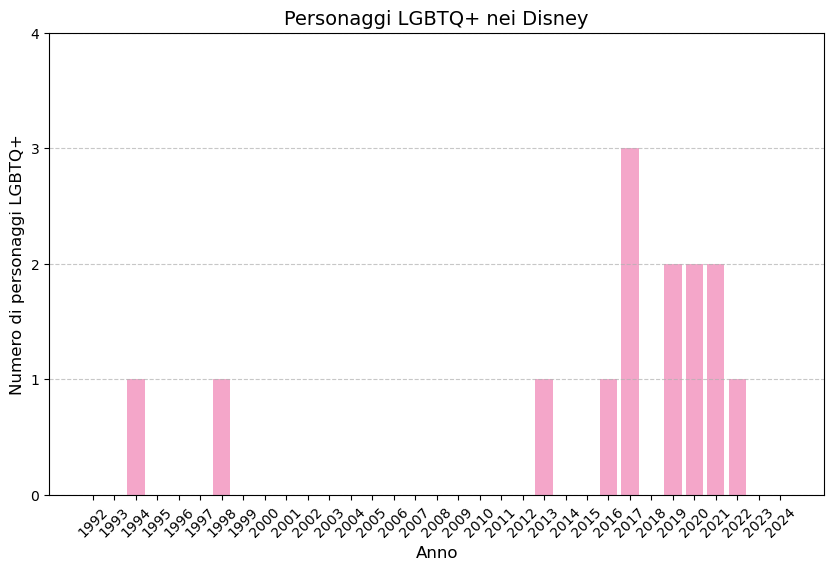

In [198]:
# Dati dei personaggi Disney LGBTQ+
personaggi = [
    ("Il re leone", 1994),
    ("A bug's life", 1998),
    ("Frozen", 2013),
    ("Zootropolis", 2016),
    ("Ducktales", 2017),
    ("Thor: ragnarock", 2017),
    ("La bella e la bestia", 2017),
    ("Star Wars", 2019),
    ("Avengers: endgame", 2019),
    ("Onward", 2020),
    ("Out", 2020),
    ("Cruella", 2021),
    ("Jungle Cruise", 2021),
    ("Red", 2022)
]

# Estrai gli anni dei personaggi
anni = [anno for _, anno in personaggi]

# Aggiungiamo gli anni dal 1992 al 2024
anni_completi = list(range(1992, 2025))

# Sommiamo i personaggi per ogni anno (o 0 se non ci sono dati)
conteggi_anni = [anni.count(anno) for anno in anni_completi]

# Creazione dell'istogramma
plt.figure(figsize=(10, 6))

# Istogramma con il colore rosa Disney
plt.bar(anni_completi, conteggi_anni, color='#F4A6C9')

# Aggiungi titoli e etichette
plt.title("Personaggi LGBTQ+ nei Disney", fontsize=14)
plt.xlabel("Anno", fontsize=12)
plt.ylabel("Numero di personaggi LGBTQ+", fontsize=12)

# Imposta il limite dell'asse Y per far partire da 0
plt.ylim(0, max(conteggi_anni) + 1)

# Modifica l'asse y per evitare numeri con la virgola
plt.gca().yaxis.get_major_locator().set_params(integer=True)

# Ruota le etichette degli anni per migliorarne la leggibilità
plt.xticks(anni_completi, rotation=45)

# Togli lo sfondo
plt.gca().set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

# Mostra il grafico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



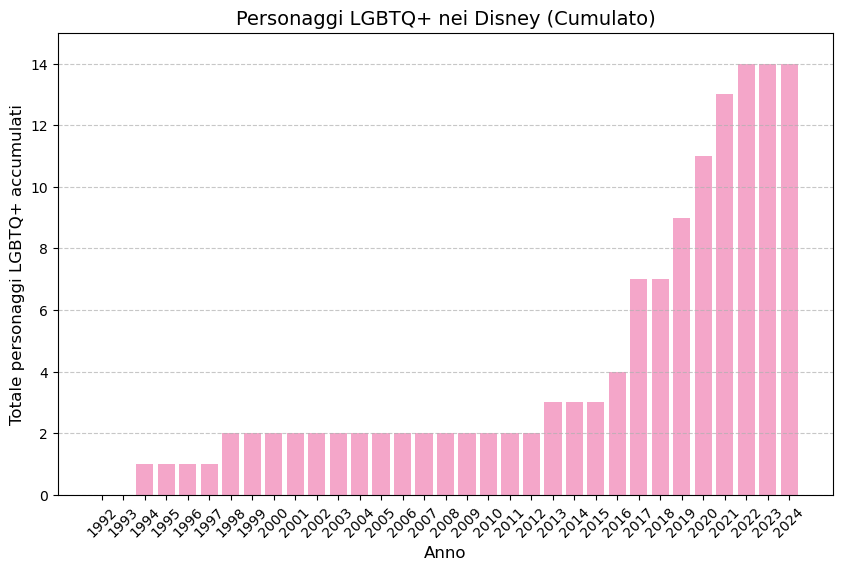

In [199]:
# Dati dei personaggi Disney LGBTQ+
personaggi = [
    ("Il re leone", 1994),
    ("A bug's life", 1998),
    ("Frozen", 2013),
    ("Zootropolis", 2016),
    ("Ducktales", 2017),
    ("Thor: ragnarock", 2017),
    ("La bella e la bestia", 2017),
    ("Star Wars", 2019),
    ("Avengers: endgame", 2019),
    ("Onward", 2020),
    ("Out", 2020),
    ("Cruella", 2021),
    ("Jungle Cruise", 2021),
    ("Red", 2022)
]

# Estrai gli anni dei personaggi
anni = [anno for _, anno in personaggi]

# Aggiungiamo gli anni dal 1992 al 2024
anni_completi = list(range(1992, 2025))

# Sommiamo i personaggi per ogni anno (o 0 se non ci sono dati)
conteggi_anni = [anni.count(anno) for anno in anni_completi]

# Calcolo delle somme cumulate
somme_cumulate = [sum(conteggi_anni[:i+1]) for i in range(len(conteggi_anni))]

# Creazione dell'istogramma
plt.figure(figsize=(10, 6))

# Istogramma con il colore rosa Disney
plt.bar(anni_completi, somme_cumulate, color='#F4A6C9')

# Aggiungi titoli e etichette
plt.title("Personaggi LGBTQ+ nei Disney (Cumulato)", fontsize=14)
plt.xlabel("Anno", fontsize=12)
plt.ylabel("Totale personaggi LGBTQ+ accumulati", fontsize=12)

# Imposta il limite dell'asse Y per far partire da 0
plt.ylim(0, max(somme_cumulate) + 1)

# Modifica l'asse y per evitare numeri con la virgola
plt.gca().yaxis.get_major_locator().set_params(integer=True)

# Ruota le etichette degli anni per migliorarne la leggibilità
plt.xticks(anni_completi, rotation=45)

# Togli lo sfondo
plt.gca().set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

# Mostra il grafico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


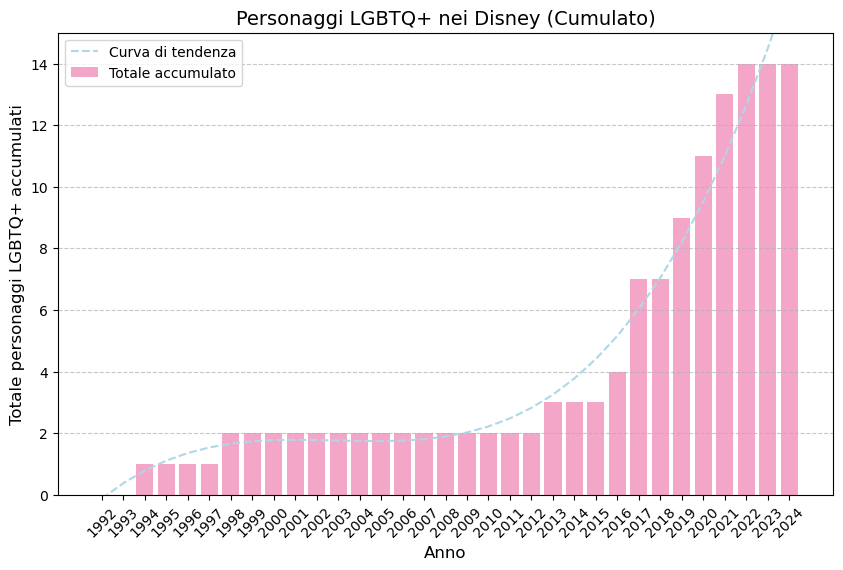

In [200]:
# Dati dei personaggi Disney LGBTQ+
personaggi = [
    ("Il re leone", 1994),
    ("A bug's life", 1998),
    ("Frozen", 2013),
    ("Zootropolis", 2016),
    ("Ducktales", 2017),
    ("Thor: ragnarock", 2017),
    ("La bella e la bestia", 2017),
    ("Star Wars", 2019),
    ("Avengers: endgame", 2019),
    ("Onward", 2020),
    ("Out", 2020),
    ("Cruella", 2021),
    ("Jungle Cruise", 2021),
    ("Red", 2022)
]

# Estrai gli anni dei personaggi
anni = [anno for _, anno in personaggi]

# Aggiungiamo gli anni dal 1992 al 2024
anni_completi = list(range(1992, 2025))

# Sommiamo i personaggi per ogni anno (o 0 se non ci sono dati)
conteggi_anni = [anni.count(anno) for anno in anni_completi]

# Calcolo delle somme cumulate
somme_cumulate = [sum(conteggi_anni[:i+1]) for i in range(len(conteggi_anni))]

# Creazione dell'istogramma
plt.figure(figsize=(10, 6))

# Istogramma con il colore rosa Disney
plt.bar(anni_completi, somme_cumulate, color='#F4A6C9', label='Totale accumulato')

# Aggiungere una curva di tendenza (regressione polinomiale di 2° grado)
x = np.array(anni_completi)
y = np.array(somme_cumulate)
coeff = np.polyfit(x, y, 3)  # Coefficiente di un polinomio di grado 3
polynomial = np.poly1d(coeff)
trend_line = polynomial(x)

# Aggiungere la curva di tendenza
plt.plot(anni_completi, trend_line, color='lightblue', linestyle='--', label='Curva di tendenza')

# Aggiungi titoli e etichette
plt.title("Personaggi LGBTQ+ nei Disney (Cumulato)", fontsize=14)
plt.xlabel("Anno", fontsize=12)
plt.ylabel("Totale personaggi LGBTQ+ accumulati", fontsize=12)

# Imposta il limite dell'asse Y per far partire da 0
plt.ylim(0, max(somme_cumulate) + 1)

# Modifica l'asse y per evitare numeri con la virgola
plt.gca().yaxis.get_major_locator().set_params(integer=True)

# Ruota le etichette degli anni per migliorarne la leggibilità
plt.xticks(anni_completi, rotation=45)

# Togli lo sfondo
plt.gca().set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

# Mostra la legenda
plt.legend()

# Mostra il grafico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


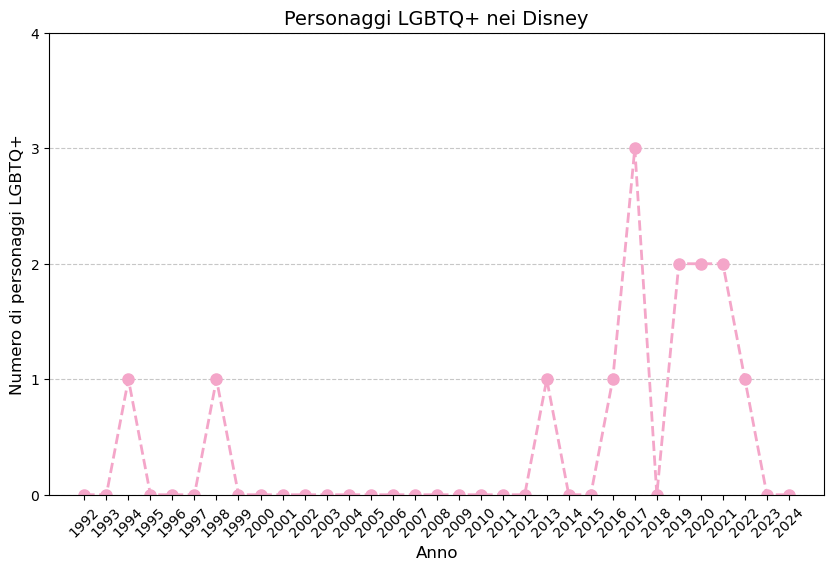

In [201]:
# Dati dei personaggi Disney LGBTQ+
personaggi = [
    ("Il re leone", 1994),
    ("A bug's life", 1998),
    ("Frozen", 2013),
    ("Zootropolis", 2016),
    ("Ducktales", 2017),
    ("Thor: ragnarock", 2017),
    ("La bella e la bestia", 2017),
    ("Star Wars", 2019),
    ("Avengers: endgame", 2019),
    ("Onward", 2020),
    ("Out", 2020),
    ("Cruella", 2021),
    ("Jungle Cruise", 2021),
    ("Red", 2022)
]

# Estrai gli anni dei personaggi
anni = [anno for _, anno in personaggi]

# Aggiungiamo gli anni dal 1992 al 2024
anni_completi = list(range(1992, 2025))

# Sommiamo i personaggi per ogni anno (o 0 se non ci sono dati)
conteggi_anni = [anni.count(anno) for anno in anni_completi]

# Creazione del grafico a linee
plt.figure(figsize=(10, 6))

# Linea tratteggiata con il colore rosa Disney
plt.plot(anni_completi, conteggi_anni, marker='o', color='#F4A6C9', linestyle='--', linewidth=2, markersize=8)

# Aggiungi titoli e etichette
plt.title("Personaggi LGBTQ+ nei Disney", fontsize=14)
plt.xlabel("Anno", fontsize=12)
plt.ylabel("Numero di personaggi LGBTQ+", fontsize=12)

# Imposta il limite dell'asse Y per far partire da 0
plt.ylim(0, max(conteggi_anni) + 1)

# Modifica l'asse y per evitare numeri con la virgola
plt.gca().yaxis.get_major_locator().set_params(integer=True)

# Ruota le etichette degli anni per migliorarne la leggibilità
plt.xticks(anni_completi, rotation=45)

# Togli lo sfondo
plt.gca().set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

# Mostra il grafico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


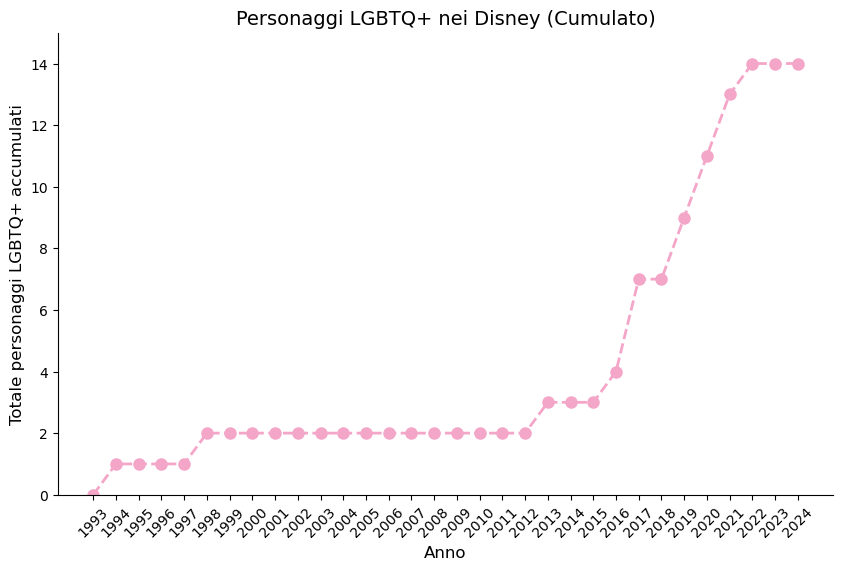

In [202]:
import matplotlib.pyplot as plt
import numpy as np

# Dati dei personaggi Disney LGBTQ+
personaggi = [
    ("Il re leone", 1994),
    ("A bug's life", 1998),
    ("Frozen", 2013),
    ("Zootropolis", 2016),
    ("Ducktales", 2017),
    ("Thor: ragnarock", 2017),
    ("La bella e la bestia", 2017),
    ("Star Wars", 2019),
    ("Avengers: endgame", 2019),
    ("Onward", 2020),
    ("Out", 2020),
    ("Cruella", 2021),
    ("Jungle Cruise", 2021),
    ("Red", 2022)
]

# Estrai gli anni dei personaggi
anni = [anno for _, anno in personaggi]

# Aggiungiamo gli anni dal 1992 al 2024
anni_completi = list(range(1993, 2025))

# Sommiamo i personaggi per ogni anno (o 0 se non ci sono dati)
conteggi_anni = [anni.count(anno) for anno in anni_completi]

# Calcolo delle somme cumulate
somme_cumulate = [sum(conteggi_anni[:i+1]) for i in range(len(conteggi_anni))]

# Creazione del grafico a linee
plt.figure(figsize=(10, 6))

# Linea tratteggiata con il colore rosa Disney
plt.plot(anni_completi, somme_cumulate, marker='o', color='#F4A6C9', linestyle='--', linewidth=2, markersize=8)

# Aggiungi titoli e etichette
plt.title("Personaggi LGBTQ+ nei Disney (Cumulato)", fontsize=14)
plt.xlabel("Anno", fontsize=12)
plt.ylabel("Totale personaggi LGBTQ+ accumulati", fontsize=12)

# Imposta il limite dell'asse Y per far partire da 0
plt.ylim(0, max(somme_cumulate) + 1)

# Modifica l'asse y per evitare numeri con la virgola
plt.gca().yaxis.get_major_locator().set_params(integer=True)

# Ruota le etichette degli anni per migliorarne la leggibilità
plt.xticks(anni_completi, rotation=45)

# Togliamo lo sfondo
ax = plt.gca()
plt.gca().set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

# Rimuovere il bordo superiore e destro
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mostra il grafico
plt.grid(False)  # Rimuove la griglia
plt.show()


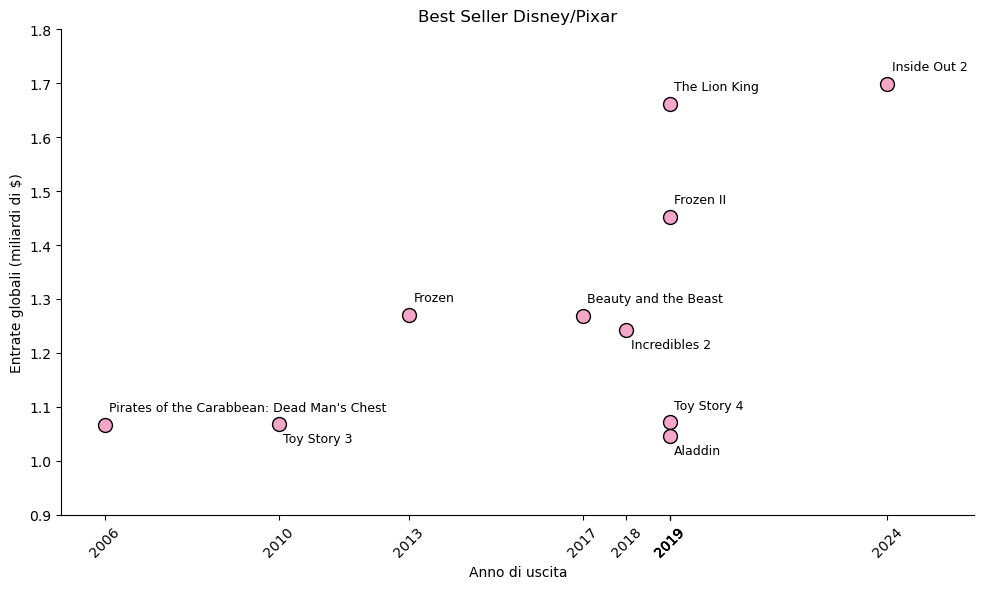

In [203]:
# Filtrare i film Disney e Pixar
franchise_list = ['Disney', 'Pixar']
dati_filtrati = dati_film[dati_film[colonna_franchise].isin(franchise_list)]

# Ordinare i dati per incasso (decrescente) e prendere i primi 10 film
dati_filtrati = dati_filtrati.sort_values(by='Incasso ($)', ascending=False).head(10)

# Dati da utilizzare
film = dati_filtrati[colonna_titolo].values
entrate = dati_filtrati[colonna_incassi].values
anni = dati_filtrati[colonna_anno].values

# Conversione delle entrate in miliardi
entrate_miliardi = [x / 1_000_000_000 for x in entrate]

# Creazione del grafico a dispersione
plt.figure(figsize=(10, 6))
plt.scatter(anni, entrate_miliardi, color='#F4A6C9', s=100, edgecolor='black')

# Impostare l'asse y che arrivi a 1.8 miliardi
plt.ylim(0.9, 1.8)

# Imposta l'asse x
plt.xlim(2005, 2026)
    
# Aggiungere etichette per ogni punto (film e anno)
for i, film_title in enumerate(film):
    # Spostare a sinistra il primo film, se necessario
    if film_title == "Toy Story 3" or film_title == "Aladdin" or film_title == "Incredibles 2":
        plt.text(anni[i] + 0.1, entrate_miliardi[i] - 0.04, film_title, 
                 fontsize=9, ha='left', va='bottom', rotation=0)
    else:
        plt.text(anni[i] + 0.1, entrate_miliardi[i] + 0.02, film_title, 
                 fontsize=9, ha='left', va='bottom', rotation=0)

# Etichette e titolo
plt.xlabel('Anno di uscita')
plt.ylabel('Entrate globali (miliardi di $)')
plt.title('Best Seller Disney/Pixar')

# Togliamo lo sfondo
ax = plt.gca()
plt.gca().set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

# Rimuovere il bordo superiore e destro
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mostrare il grafico
plt.grid(False)  # Rimuove la griglia
plt.xticks(anni, rotation=45)  # Ruotare le etichette degli anni per migliorare la leggibilità
plt.tight_layout()
plt.show()

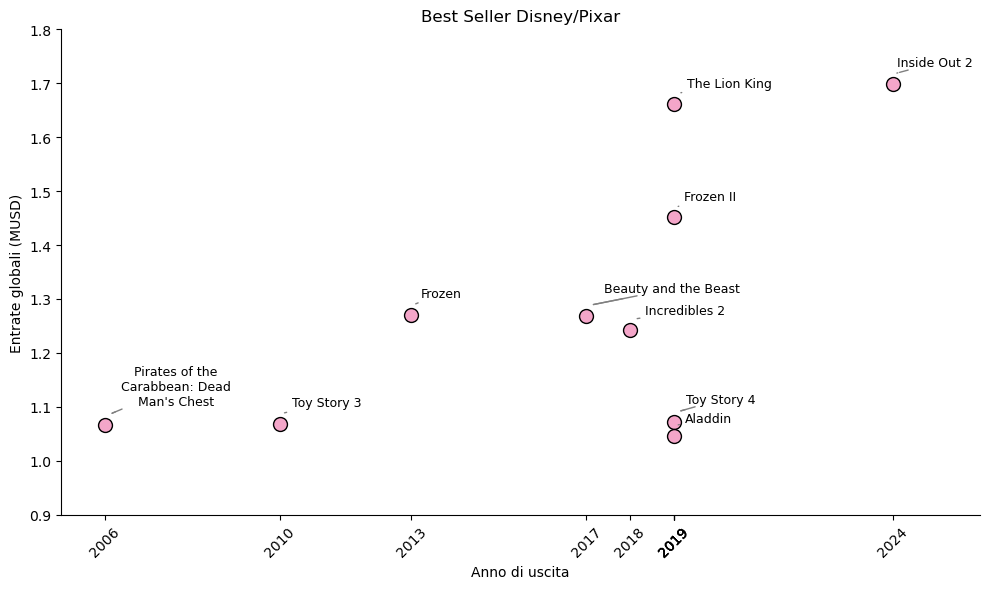

In [204]:
from adjustText import adjust_text

# Funzione per spezzare i titoli in base alle parole
def break_title_by_words(title, max_length=20):
    words = title.split()  # Dividi il titolo in parole
    lines = []  # Lista per le righe del titolo
    current_line = ""  # Riga corrente
    
    for word in words:
        # Aggiungi la parola alla riga corrente se non supera la lunghezza massima
        if len(current_line) + len(word) + 1 <= max_length:
            if current_line:
                current_line += " " + word  # Aggiungi la parola con uno spazio
            else:
                current_line = word  # La prima parola senza spazio
        else:
            # Se la riga supera la lunghezza, inizia una nuova riga
            lines.append(current_line)
            current_line = word  # La parola che non entra inizia una nuova riga
    
    # Aggiungi l'ultima riga
    if current_line:
        lines.append(current_line)
    
    return '\n'.join(lines)  # Unisci le righe con il carattere di nuova riga

# Creazione del grafico a dispersione
plt.figure(figsize=(10, 6))
plt.scatter(anni, entrate_miliardi, color='#F4A6C9', s=100, edgecolor='black')

# Impostare l'asse y che arrivi a 1.8 miliardi
plt.ylim(0.9, 1.8)

# Imposta l'asse x
plt.xlim(2005, 2026)

# Aggiungere etichette per ogni punto (film e anno)
texts = []  # Lista per raccogliere gli oggetti di testo
for i, film_title in enumerate(film):
    # Spezza il titolo in base alla lunghezza delle parole
    broken_title = break_title_by_words(film_title)

    # Aggiungi il testo per ogni film con il titolo spezzato
    text = plt.annotate(broken_title, 
                        (anni[i] + 0.1, entrate_miliardi[i] + 0.02), 
                        fontsize=9, ha='left', va='bottom', rotation=0,
                        arrowprops=dict(arrowstyle="-", color='gray'))  # Aggiungi freccia
    
    texts.append(text)  # Aggiungi ogni etichetta alla lista

# Aggiungi un'ottimizzazione automatica per evitare sovrapposizioni
adjust_text(texts, only_move={'points': 'none', 'text': 'y'}, arrowprops=dict(arrowstyle="-", color='gray'))

# Etichette e titolo
plt.xlabel('Anno di uscita')
plt.ylabel('Entrate globali (MUSD)')
plt.title('Best Seller Disney/Pixar')

# Togliamo lo sfondo
ax = plt.gca()
plt.gca().set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

# Rimuovere il bordo superiore e destro
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mostrare il grafico
plt.grid(False)  # Rimuove la griglia
plt.xticks(anni, rotation=45)  # Ruotare le etichette degli anni per migliorare la leggibilità
plt.tight_layout()
plt.show()

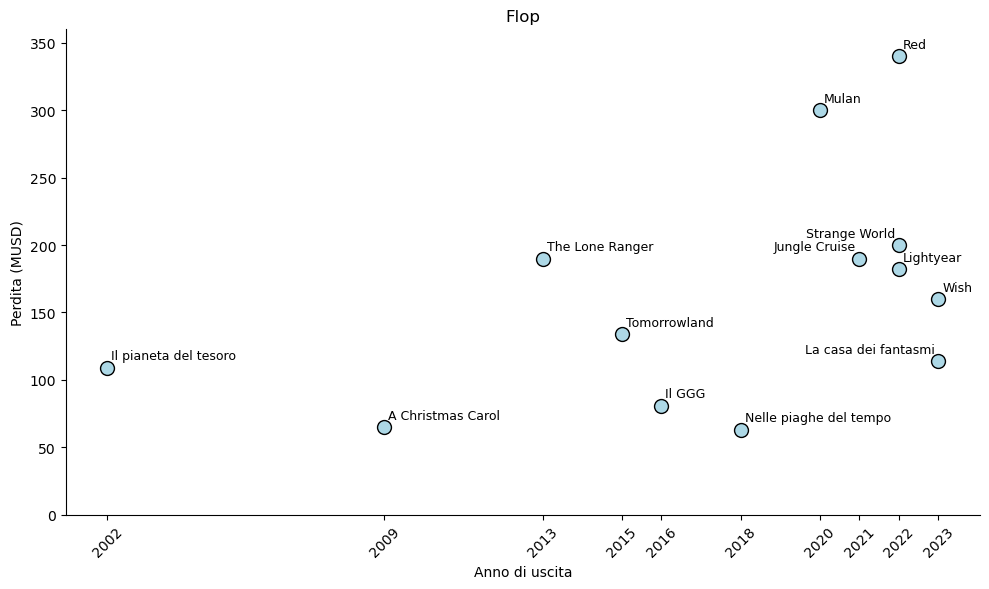

In [213]:
# Dati dei film flop, anni di uscita e relative perdite
film_flop = [
    "Nelle piaghe del tempo", "A Christmas Carol", "Il GGG", 
    "Il pianeta del tesoro", "Tomorrowland",
    "Wish", "Lightyear", "Jungle Cruise", "The Lone Ranger", 
    "La casa dei fantasmi", "Strange World", "Mulan", "Red"
]

anni_uscita = [2018, 2009, 2016, 2002, 2015, 2023, 2022, 2021, 2013, 2023, 2022, 2020, 2022]
perdite = [
    63, 65, 81, 109, 134, 160, 182, 190, 190, 114, 200, 300, 340  # in milioni di dollari
]

# Creazione del grafico a dispersione
plt.figure(figsize=(10, 6))
plt.scatter(anni_uscita, perdite, color='lightblue', s=100, edgecolor='black')

# Aggiungere etichette per ogni punto (film e anno)
for i, film_title in enumerate(film_flop):
    # Spostare a sinistra Jungle Cruise, Strange World e La casa dei fantasmi
    if film_title in ["Jungle Cruise", "Strange World", "La casa dei fantasmi"]:
        plt.text(anni_uscita[i] - 0.1, perdite[i] + 4, film_title, 
                 fontsize=9, ha='right', va='bottom', rotation=0)
    else:
        plt.text(anni_uscita[i] + 0.1, perdite[i] + 4, film_title, 
                 fontsize=9, ha='left', va='bottom', rotation=0)

# Etichette e titolo
plt.xlabel('Anno di uscita')
plt.ylabel('Perdita (MUSD)')
plt.title('Flop')

# Impostare l'asse y che parte da 0 e va oltre la perdita massima
plt.ylim(0, max(perdite) + 20)

# Impostare l'asse x con gli anni effettivi
plt.xticks(sorted(set(anni_uscita)), rotation=45)

# Togliamo lo sfondo
ax = plt.gca()
plt.gca().set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

# Rimuovere il bordo superiore e destro
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mostrare il grafico
plt.grid(False)  # Rimuove la griglia
plt.tight_layout()
plt.show()

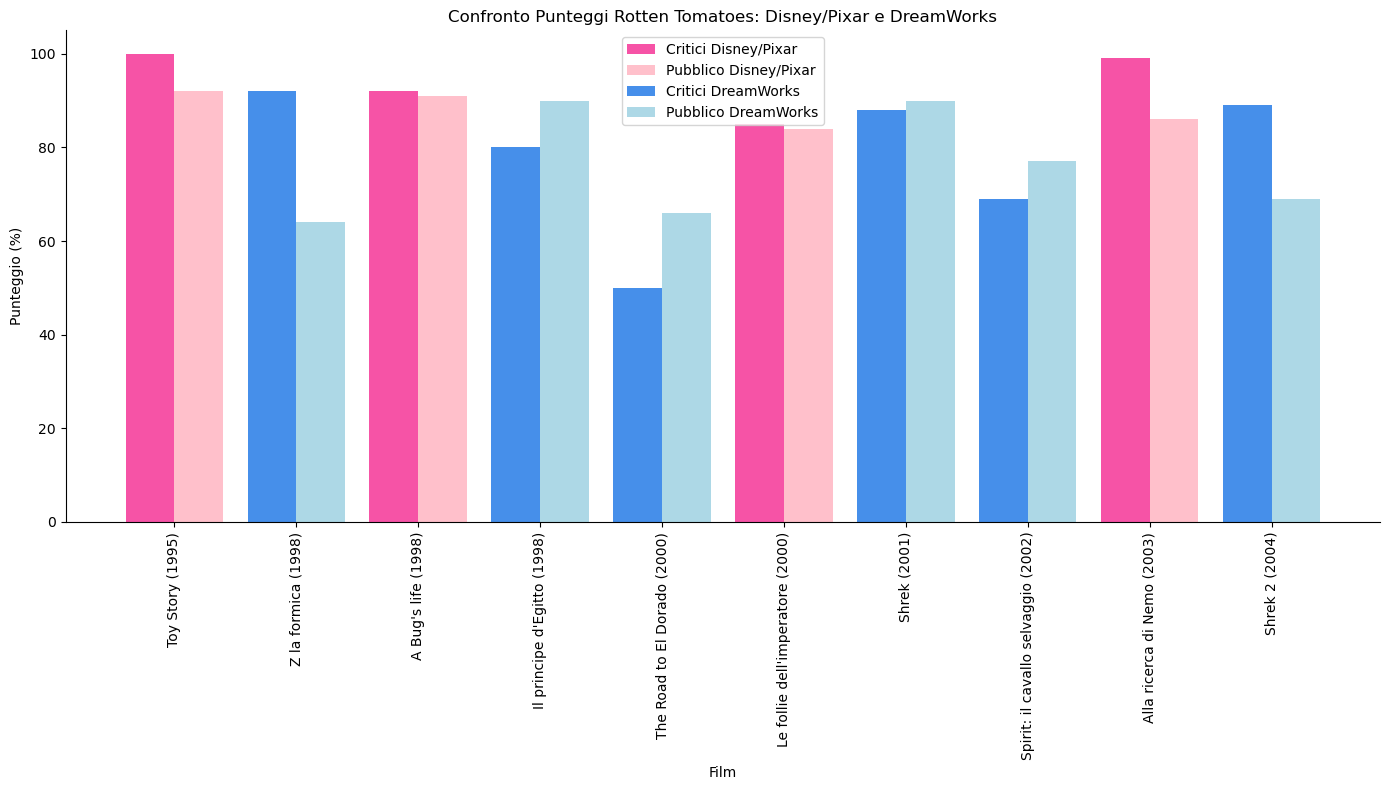

In [206]:
# Dati per i film Disney/Pixar e DreamWorks
films_disney_pixar = ['Toy Story (1995)', "A Bug's life (1998)", "Le follie dell'imperatore (2000)", 'Alla ricerca di Nemo (2003)']
critics_disney_pixar = [100, 92, 85, 99]
audience_disney_pixar = [92, 91, 84, 86]

films_dreamworks = ['Z la formica (1998)', "Il principe d'Egitto (1998)",  'The Road to El Dorado (2000)', 'Shrek (2001)', 'Spirit: il cavallo selvaggio (2002)', 'Shrek 2 (2004)']
critics_dreamworks = [92, 80, 50, 88, 69, 89]
audience_dreamworks = [64, 90, 66, 90, 77, 69]

# Unire i dati di Disney/Pixar e DreamWorks
films = films_dreamworks + films_disney_pixar
critics = critics_dreamworks + critics_disney_pixar
audience = audience_dreamworks + audience_disney_pixar

# Modifica dell'ordine per mettere 'A Bug's Life' prima de 'Il principe d'Egitto'
index_bugs_life = films.index("A Bug's life (1998)")
index_prince_egypt = films.index("Il principe d'Egitto (1998)")

# Scambia i posti
films[index_bugs_life], films[index_prince_egypt] = films[index_prince_egypt], films[index_bugs_life]
critics[index_bugs_life], critics[index_prince_egypt] = critics[index_prince_egypt], critics[index_bugs_life]
audience[index_bugs_life], audience[index_prince_egypt] = audience[index_prince_egypt], audience[index_bugs_life]

# Estrai l'anno di uscita di ciascun film per l'ordinamento
years = [int(film.split('(')[1].split(')')[0]) for film in films]

# Ordinare tutti i film in base all'anno di uscita
sorted_data = sorted(zip(films, critics, audience, years), key=lambda x: x[3])
films_sorted, critics_sorted, audience_sorted, years_sorted = zip(*sorted_data)

# Creazione delle posizioni per le barre
x = np.arange(len(films_sorted))

# Impostazione delle dimensioni del grafico
plt.figure(figsize=(14, 8))

# Creazione delle barre per i film
for i, film in enumerate(films_sorted):
    if film in films_disney_pixar:
        # Colori per i film Disney/Pixar
        plt.bar(x[i] - 0.2, critics_sorted[i], 0.4, color='#F653A6')  # Critici Disney/Pixar in fucsia
        plt.bar(x[i] + 0.2, audience_sorted[i], 0.4, color='pink')    # Pubblico Disney/Pixar in rosa
    else:
        # Colori per i film DreamWorks
        plt.bar(x[i] - 0.2, critics_sorted[i], 0.4, color='#468FEA')      # Critici DreamWorks in blu
        plt.bar(x[i] + 0.2, audience_sorted[i], 0.4, color='lightblue')   # Pubblico DreamWorks in azzurro

# Aggiunta delle etichette
plt.xlabel('Film')
plt.ylabel('Punteggio (%)')
plt.title('Confronto Punteggi Rotten Tomatoes: Disney/Pixar e DreamWorks')
plt.xticks(x, films_sorted, rotation=90)
plt.legend(['Critici Disney/Pixar', 'Pubblico Disney/Pixar', 'Critici DreamWorks', 'Pubblico DreamWorks'])

# Togliamo lo sfondo
ax = plt.gca()
plt.gca().set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

# Rimuovere il bordo superiore e destro
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mostrare il grafico
plt.tight_layout()
plt.show()

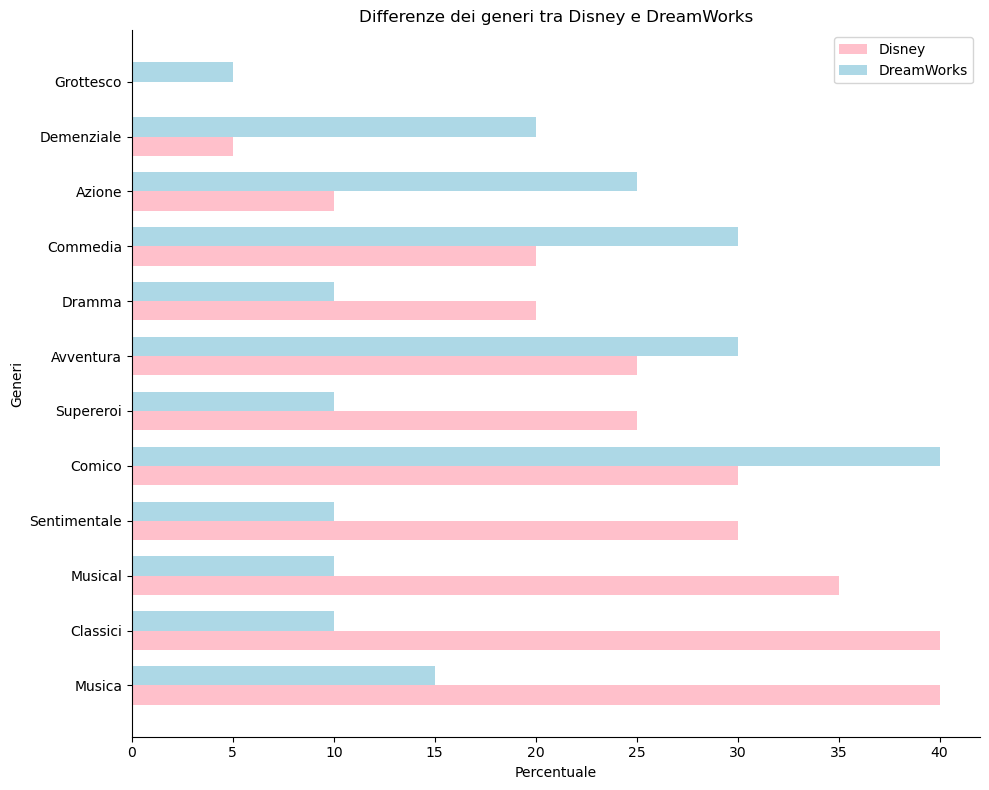

In [228]:
# Dati per Disney e DreamWorks
disney_data = [25, 10, 40, 30, 20, 5, 20, 0, 40, 35, 30, 25]
dreamworks_data = [30, 25, 10, 40, 30, 20, 10, 5, 15, 10, 10, 10]

# Etichette per i generi
labels = ['Avventura', 'Azione', 'Classici', 'Comico', 'Commedia', 'Demenziale', 
          'Dramma', 'Grottesco', 'Musica', 'Musical', 
          'Sentimentale', 'Supereroi']

# Ordinamento in base ai valori di Disney (dal più alto al più basso)
sorted_indices = np.argsort(disney_data)[::-1]  # Indici ordinati in ordine decrescente

# Riordinare i dati
disney_data = np.array(disney_data)[sorted_indices]
dreamworks_data = np.array(dreamworks_data)[sorted_indices]
labels = np.array(labels)[sorted_indices]

# Creazione del grafico
y = np.arange(len(labels))  # Posizione delle barre
height = 0.35  # Altezza delle barre

fig, ax = plt.subplots(figsize=(10, 8))

# Barre per Disney e DreamWorks
bars1 = ax.barh(y - height/2, disney_data, height, label='Disney', color='pink')
bars2 = ax.barh(y + height/2, dreamworks_data, height, label='DreamWorks', color='lightblue')

# Aggiunta delle etichette, titolo e altre configurazioni
ax.set_xlabel('Percentuale')
ax.set_ylabel('Generi')
ax.set_title('Differenze dei generi tra Disney e DreamWorks')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend()

# Togliamo lo sfondo
ax = plt.gca()
plt.gca().set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

# Rimuovere il bordo superiore e destro
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mostra il grafico
plt.tight_layout()
plt.show()

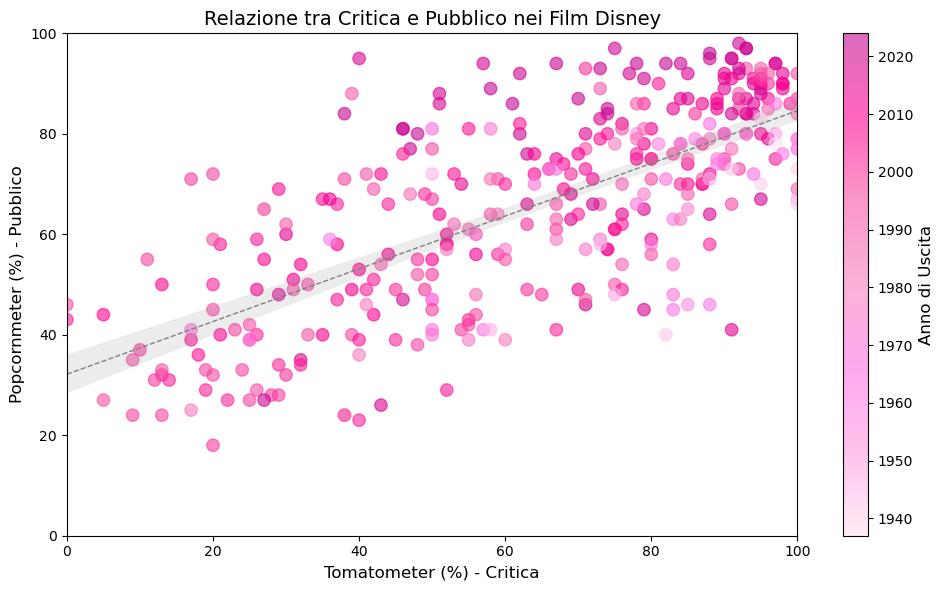

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np

# Convertire le colonne in numerico
dati_film[colonna_tomatometer] = pd.to_numeric(dati_film[colonna_tomatometer], errors="coerce")
dati_film[colonna_popcornmeter] = pd.to_numeric(dati_film[colonna_popcornmeter], errors="coerce")
dati_film[colonna_anno] = pd.to_numeric(dati_film[colonna_anno], errors="coerce")

# Rimuovere eventuali valori NaN
dati_film = dati_film.dropna(subset=[colonna_tomatometer, colonna_popcornmeter, colonna_anno])

# Normalizzare gli anni per il mapping dei colori
norm = plt.Normalize(dati_film[colonna_anno].min(), dati_film[colonna_anno].max())

# Creare lo scatter plot con colori continui in base all'anno
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    dati_film[colonna_tomatometer], 
    dati_film[colonna_popcornmeter], 
    c=dati_film[colonna_anno],  # Colore basato sull'anno
    cmap = mcolors.LinearSegmentedColormap.from_list("rosa_colors", rosa_colors),
    alpha=0.6, 
    s=80  # Dimensione dei punti
)

# Aggiungere una barra dei colori per mostrare la scala degli anni
cbar = plt.colorbar(scatter)
cbar.set_label("Anno di Uscita", fontsize=12)

# Linea di tendenza
sns.regplot(
    data=dati_film, 
    x=colonna_tomatometer, 
    y=colonna_popcornmeter, 
    scatter=False, 
    color="gray", 
    line_kws={"linestyle":"dashed", "linewidth": 1}
)

# Personalizzazioni
plt.xlabel("Tomatometer (%) - Critica", fontsize=12)
plt.ylabel("Popcornmeter (%) - Pubblico", fontsize=12)
plt.title("Relazione tra Critica e Pubblico nei Film Disney", fontsize=14)
plt.xlim(0, 100)
plt.ylim(0, 100)

# Togliere lo sfondo
plt.gca().set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

# Mostrare il grafico
plt.tight_layout()
plt.show()


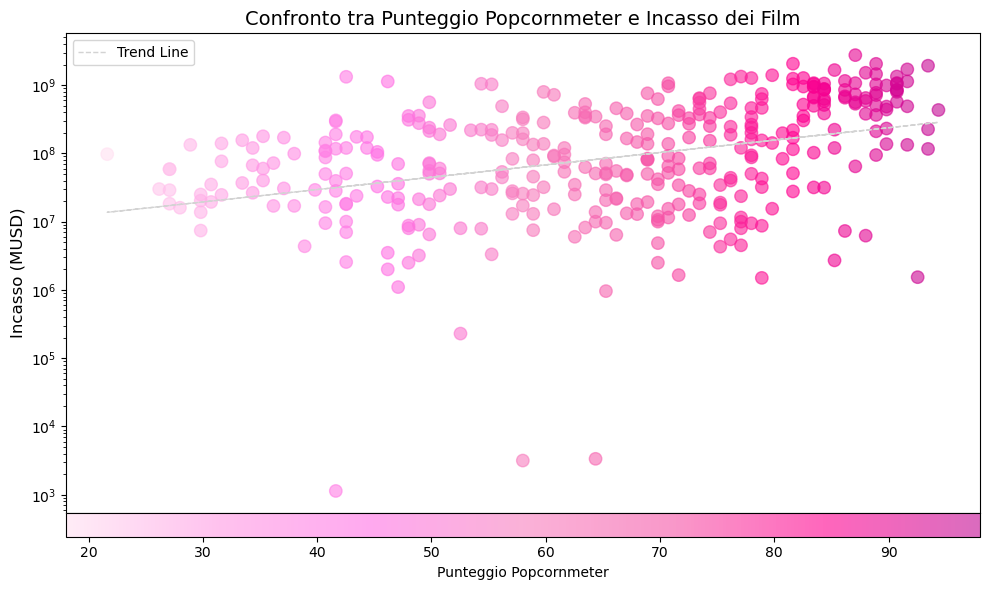

In [209]:
# Convertire le colonne in numerico
dati_film[colonna_incassi] = pd.to_numeric(dati_film[colonna_incassi], errors="coerce")
dati_film[colonna_popcornmeter] = pd.to_numeric(dati_film[colonna_popcornmeter], errors="coerce")

# Rimuovere le righe con valori mancanti per entrambi i parametri
dati_filtrati = dati_film.dropna(subset=[colonna_incassi, colonna_popcornmeter])

# Creazione dello scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(
    dati_filtrati[colonna_popcornmeter],  # Asse X: Punteggio Popcornmeter
    dati_filtrati[colonna_incassi],  # Asse Y: Guadagno (già in MUSD)
    alpha=0.6,  # Trasparenza dei punti
    c=dati_filtrati[colonna_popcornmeter],  # Colore in base al Popcornmeter
    cmap=mcolors.LinearSegmentedColormap.from_list("rosa_colors", rosa_colors),  # Mappa colori
    s=80  # Dimensione dei punti
)

# Calcolare la linea di tendenza
x = dati_filtrati[colonna_popcornmeter]
y = dati_filtrati[colonna_incassi]

# Regressione lineare in scala logaritmica
coeff = np.polyfit(x, np.log(y), 1)  
tendenza = np.exp(coeff[1]) * np.exp(coeff[0] * x)  

# Disegnare la linea di tendenza
ax.plot(x, tendenza, color="lightgrey", linewidth=1, linestyle="--", label="Trend Line")

# Aggiungere le etichette sugli assi
ax.set_ylabel("Incasso (MUSD)", fontsize=12)
ax.set_title("Confronto tra Punteggio Popcornmeter e Incasso dei Film", fontsize=14)

# Impostare la scala logaritmica per l'asse Y
ax.set_yscale("log")

# Rimuovere i valori dell'asse X
ax.set_xticks([])

# Creare un asse per la barra dei colori attaccata all'asse X
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0)  # Barra colori sotto l'asse X

# Aggiungere la barra dei colori orizzontale
cbar = plt.colorbar(scatter, cax=cax, orientation='horizontal', label="Punteggio Popcornmeter")

# Togliere lo sfondo
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

# Personalizzare l'aspetto del grafico
ax.legend()
plt.tight_layout()
plt.show()



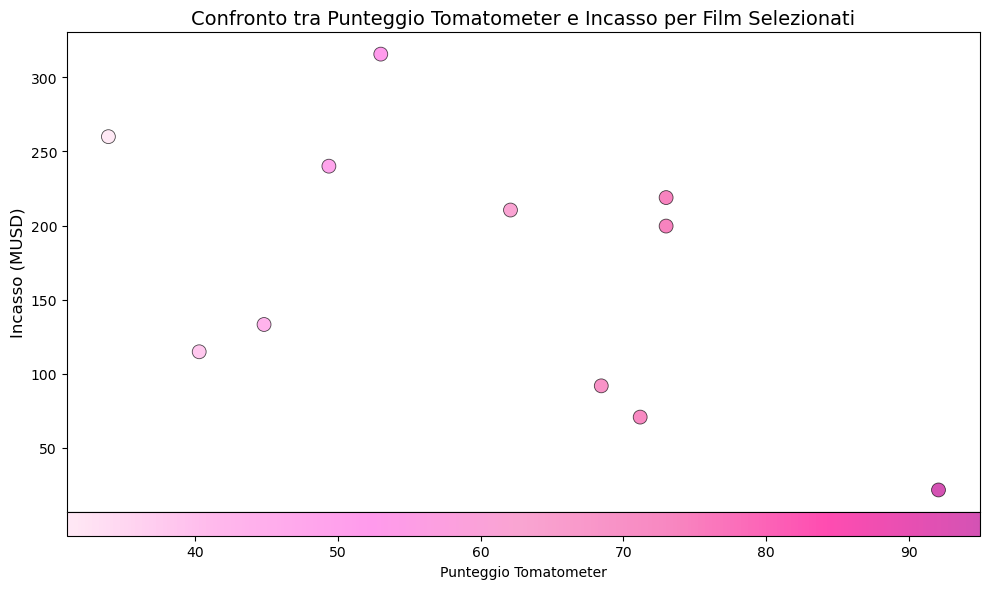

In [210]:
nomi_film_selezionati = [
    "A Wrinkle in Time", "Disney’s A Christmas Carol", "The BFG", 
    "Treasure Planet", "Tomorrowland",
    "Wish", "Lightyear", "Jungle Cruise", "The Lone Ranger", 
    "Haunted Mansion", "Strange World", "Mulan (Live Action)", "Turning Red"
]

# Convertire le colonne in numerico
dati_film[colonna_incassi] = pd.to_numeric(dati_film[colonna_incassi], errors="coerce")
dati_film[colonna_tomatometer] = pd.to_numeric(dati_film[colonna_tomatometer], errors="coerce")

# Filtrare i dati per i film selezionati
dati_filtrati = dati_film[dati_film['Titolo'].isin(nomi_film_selezionati)]

# Rimuovere le righe con valori mancanti per entrambi i parametri
dati_filtrati = dati_filtrati.dropna(subset=[colonna_incassi, colonna_tomatometer])

# Creare una nuova colonna con incassi in milioni di dollari (MUSD)
dati_filtrati["Incasso (MUSD)"] = dati_filtrati[colonna_incassi] / 1_000_000

# Creazione dello scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(
    dati_filtrati[colonna_tomatometer],  # Asse X: Punteggio Tomatometer
    dati_filtrati["Incasso (MUSD)"],  # Asse Y: Guadagno in MUSD
    alpha=0.7,  # Trasparenza dei punti
    c=dati_filtrati[colonna_tomatometer],  # Colore in base al Tomatometer
    cmap=mcolors.LinearSegmentedColormap.from_list("rosa_colors", rosa_colors),  # Mappa colori
    edgecolors="black",  # Contorno nero attorno ai punti
    linewidth=0.6,  # Spessore del contorno
    s=100  # Dimensione dei punti
)

# Aggiungere le etichette sugli assi
ax.set_ylabel("Incasso (MUSD)", fontsize=12)  
ax.set_title("Confronto tra Punteggio Tomatometer e Incasso per Film Selezionati", fontsize=14)

# Rimuovere i valori dell'asse X
ax.set_xticks([])

# Creare un asse per la barra dei colori attaccata all'asse X
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0)  # Barra colori sotto l'asse X

# Aggiungere la barra dei colori orizzontale
cbar = plt.colorbar(scatter, cax=cax, orientation='horizontal', label="Punteggio Tomatometer")

# Togliere lo sfondo
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

# Personalizzare l'aspetto del grafico
plt.tight_layout()
plt.show()


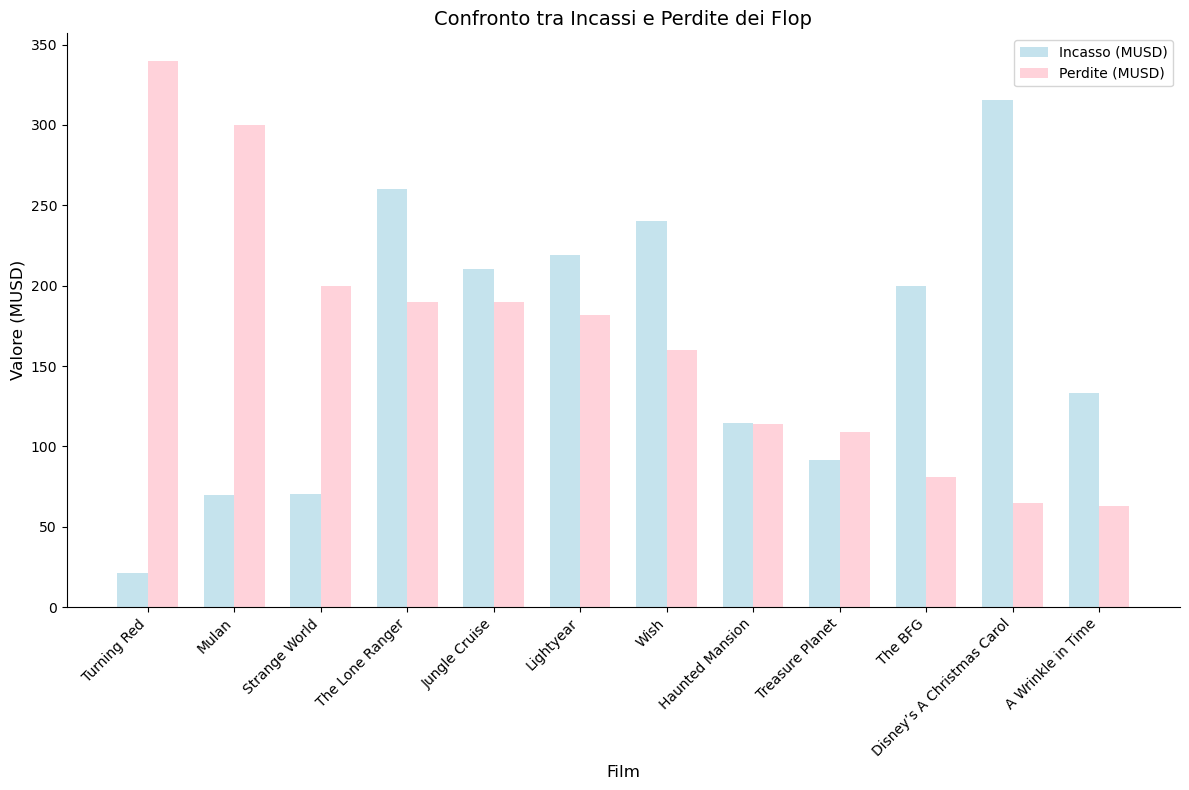

In [211]:
film_interessati = [
    "A Wrinkle in Time", "Disney’s A Christmas Carol", "The BFG", 
    "Treasure Planet", "Tomorrowland", "Wish", "Lightyear", "Jungle Cruise", 
    "The Lone Ranger", "Haunted Mansion", "Strange World", "Mulan", 
    "Turning Red"
]

# Filtrare i dati per i film di interesse, ma solo per Mulan prendi il live action
dati_film_filtrati = dati_film[dati_film['Titolo'].isin(film_interessati)]

# Aggiungere una condizione specifica per "Mulan" per prendere solo il tipo "Live Action"
dati_film_filtrati = dati_film_filtrati[
    (dati_film_filtrati['Titolo'] != "Mulan") | (dati_film_filtrati['Tipo'] == "Live Action")
].copy()  # Usa .copy() per evitare l'avviso

# Convertire la colonna degli incassi in numerico (se necessario)
dati_film_filtrati.loc[:, colonna_incassi] = pd.to_numeric(dati_film_filtrati[colonna_incassi], errors='coerce')

# Convertire gli incassi in milioni di dollari (MUSD)
dati_film_filtrati['Incasso (MUSD)'] = dati_film_filtrati[colonna_incassi] / 1_000_000

# Dati delle perdite
film_flop = [
    "A Wrinkle in Time", "Disney’s A Christmas Carol", "The BFG", 
    "Treasure Planet", "Tomorrowland", "Wish", "Lightyear", "Jungle Cruise", 
    "The Lone Ranger", "Haunted Mansion", "Strange World", "Mulan", "Turning Red"
]
perdite = [
    63, 65, 81, 109, 134, 160, 182, 190, 190, 114, 200, 300, 340  # in milioni di dollari
]

# Creare un dizionario con le perdite per ogni film
dati_perdite = dict(zip(film_flop, perdite))

# Aggiungere una colonna per le perdite nel dataframe dei film filtrati
dati_film_filtrati['Perdite (MUSD)'] = dati_film_filtrati['Titolo'].map(dati_perdite)

# Ordinare il dataframe in base agli incassi (dal più alto al più basso)
dati_film_filtrati = dati_film_filtrati.sort_values(by='Perdite (MUSD)', ascending=False)

# Creare un grafico a barre per il confronto tra incassi e perdite
fig, ax = plt.subplots(figsize=(12, 8))

# Posizioni per le barre
x = range(len(dati_film_filtrati))

# Larghezza delle barre
bar_width = 0.35

# Impostare le barre per gli incassi
ax.bar(x, dati_film_filtrati['Incasso (MUSD)'], width=bar_width, color='lightblue', alpha=0.7, label='Incasso (MUSD)')

# Impostare le barre per le perdite
ax.bar([i + bar_width for i in x], dati_film_filtrati['Perdite (MUSD)'], width=bar_width, color='pink', alpha=0.7, label='Perdite (MUSD)')

# Etichette degli assi
ax.set_xlabel("Film", fontsize=12)
ax.set_ylabel("Valore (MUSD)", fontsize=12)
ax.set_title("Confronto tra Incassi e Perdite dei Flop", fontsize=14)

# Etichette dei film sull'asse X
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(dati_film_filtrati['Titolo'], rotation=45, ha="right", fontsize=10)

# Legenda
ax.legend()

# Togliamo lo sfondo
ax = plt.gca()
plt.gca().set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

# Rimuovere il bordo superiore e destro
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mostrare il grafico
plt.tight_layout()
plt.show()

